# Linear Regression model with Gas Consumption Data

- we make linear regression model with Busan city's gas consumption and average tempurature from 2009-01 to 2018-05.
- we will predict Busan city's gas consumption from 2009_01 to 2019-05 by linear regression model.

### 1) import packages

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### 2) load datasets

In [3]:
# train : BUSAN_gas_consumption from 2009-01 to 2019-05 (113 months)
# temp_train_orig : BUSAN_average_tempurature from 2009-01 to 2019_12

train = pd.read_csv("train_processing.csv", encoding="utf-8", index_col=0)
temp_train_orig = pd.read_csv("ta_20200406200355.csv", encoding = "cp949" , skiprows =7, usecols = ['평균기온(℃)'])

Y = train.values[:,:]
# sample_submission = pd.read_csv("sample_submission.csv", encoding="utf-8", index_col=0)

In [ ]:
### 3) Explore datasets

In [4]:
train.head()

,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,...,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
id,,,,,,,,,,,,,,,,,,,,,
0,26.680000,11.860000,19.77,14.83,7.90,2.96,5.93,4.94,4.94,4.94,...,1.970000,0.980000,2.960000,4.94000,6.91,9.88,106.593159,2.960000,7.900000,4.940000
1,107.730000,77.090000,79.09,4.94,48.44,22.74,33.61,23.72,23.72,25.70,...,11.850000,11.850000,19.760000,22.73000,38.54,145.28,56.330000,62.260000,58.310000,32.610000
2,94.880000,90.930000,78.10,66.24,38.55,25.70,27.68,26.69,18.78,15.81,...,12.827224,13.074939,21.972128,40.99625,81.04,130.45,71.150000,81.902149,66.499429,42.229145
3,115.487984,114.181544,149.29,51.41,6.92,8.89,2.96,2.96,1.97,3.95,...,12.827224,13.074939,5.920000,26.68000,74.12,158.12,159.110000,105.750000,86.970000,43.480000
4,97.850000,97.850000,70.19,60.31,31.63,25.70,20.76,22.74,20.76,20.76,...,8.890000,8.890000,16.800000,22.73000,20.75,26.68,32.610000,19.760000,21.740000,15.810000


In [5]:
temp_train_orig.head()

,평균기온(℃)
0,3.5
1,8.3
2,9.8
3,14.3
4,18.6


In [6]:
# temp_train : indexing tempurature from 2009-01 to 2019-05 (113 months)
temp_train = temp_train_orig.values[:-7,:].T

In [7]:
# explore datasets
print("Shape of Y :" ,Y.shape)
print("Shape of temp_train :", temp_train.shape)
print("Type of y_train :" , type(Y))
print("Type of temp_train :" , type(temp_train))

Shape of Y : (71588, 125)
Shape of temp_train : (1, 125)
Type of y_train : <class 'numpy.ndarray'>
Type of temp_train : <class 'numpy.ndarray'>


### 4) Linear Regression Model

In [8]:
model = LinearRegression(fit_intercept=True)
model = model.fit(temp_train.T, Y.T)

### 5) Result

In [11]:
# explore W & b
W = model.coef_
b = model.intercept_
b = b.reshape(Y.shape[0] , 1)

print("W =", W)
print("b =", b)
print()
print("Shape of W :", W.shape)
print("Shape of b :", b.shape)

W = [[-1.16227593]
 [-2.71828537]
 [-4.97216028]
 ...
 [-0.97536973]
 [-5.63698426]
 [-1.8767075 ]]
b = [[ 30.94099919]
 [ 77.44612016]
 [137.6221876 ]
 ...
 [ 27.21613845]
 [157.7276123 ]
 [ 64.09064265]]

Shape of W : (71588, 1)
Shape of b : (71588, 1)


### 6) Visualization of an id

In [21]:
def plot(W,b,temp,y,n) : 
    # propagation
    Z = np.dot(W,temp) + b
    
    nth_temp = temp[0]
    
    # indexing n_th data
    nth_Z = Z[n-1]
    nth_y = y[n-1]
    
    # visualization
    plt.plot(nth_temp, nth_Z, color = "red")
    plt.scatter(nth_temp, nth_y, color = "blue")
#     plt.plot(nth_temp, nth_y,'o', color = "blue") # same as above
    plt.title("id = {0}".format(n))
    plt.xlabel("Average temperature per month")
    plt.ylabel("Gas consumption")
    plt.show()

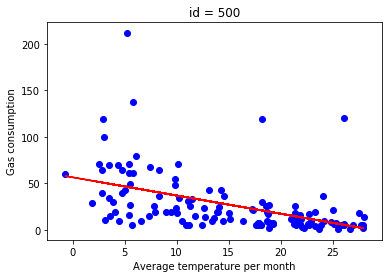

In [23]:
plot(W, b, temp_train, Y, n = 500)  # you can change "n"

- 'Average temperature' and 'Gas consumption' seem proportional to each other.

### 7) Predict & Check RMSE

In [27]:
# predict gas consumption from 2009-01 to 2019-05 by using linear model
Y_hat = np.dot(W,temp_train) + b

In [43]:
print(Y.shape)
print(Y_hat.shape)

(71588, 125)
(71588, 125)


In [48]:
RMSE = mean_squared_error(Y, Y_hat) ** 0.5
print("RMSE :" , RMSE)

RMSE : 44.96304784537202
